# Principal Component Analysis (PCA) on images

**Principal Component Analysis, or PCA**, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. 

We will do here PCA on an **image file.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.image import imread
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
import cv2

In [2]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [3]:
image_name = 'eiffel.jpg'

In [4]:
image = imread(image_name)
print("Image shape:", image.shape)

Image shape: (1500, 998, 3)


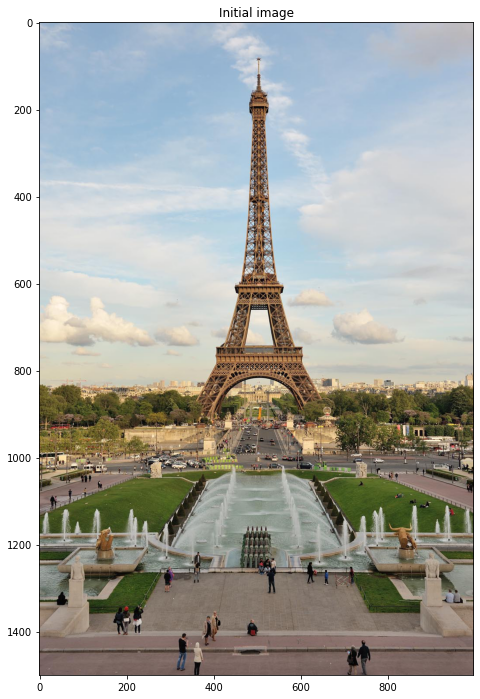

In [5]:
plt.figure(figsize=[15, 12])
plt.title('Initial image')
#plt.axis('off')
plt.imshow(image)

### Show the new shape of the image without color


nbpca (Number of principal components) = 208 explains 99 % of variance of the initial image


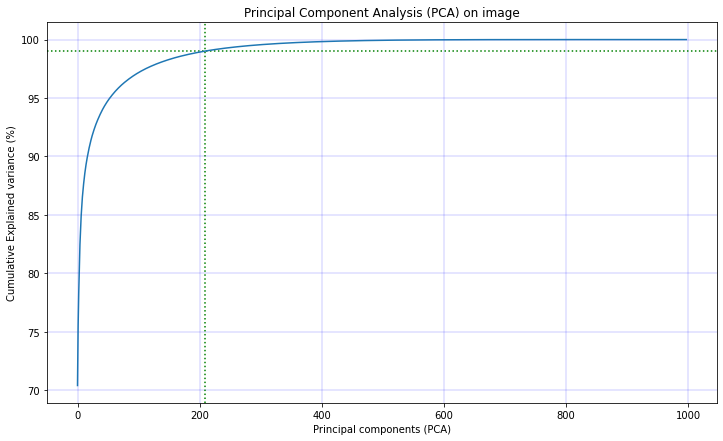

In [6]:
image2 = image.sum(axis = 2)

pca = PCA()
pca.fit(image2)

cumulated_variance = np.cumsum(pca.explained_variance_ratio_) * 100

pct_varlevel = 99

nb_pca = np.argmax(cumulated_variance >= pct_varlevel)
print("nbpca (Number of principal components) =", nb_pca, "explains", pct_varlevel, "% of variance of the initial image")

plt.figure(figsize=[12, 7])
plt.title('Principal Component Analysis (PCA) on image')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components (PCA)')
plt.grid(color = 'blue', linestyle = '-', linewidth = 0.2)
plt.axvline(x = nb_pca, color = "green", linestyle = "dotted")
plt.axhline(y = pct_varlevel, color = "green", linestyle = "dotted")

ax = plt.plot(cumulated_variance)

nbpca (number of principal components) = 53 explains 95 % of variance of the initial image


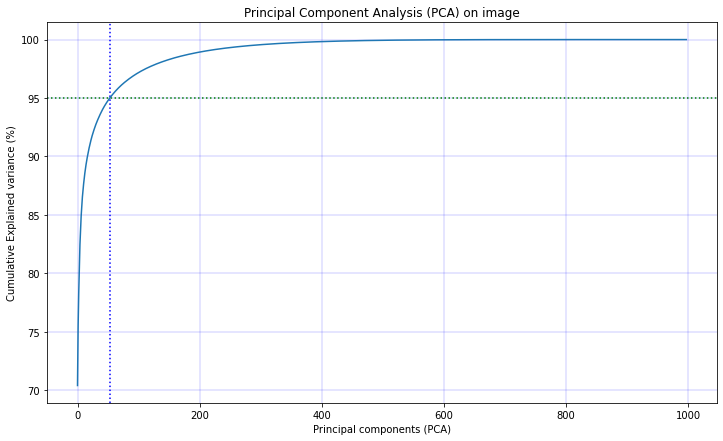

In [7]:
pca = PCA()
pca.fit(image2)

cumulated_variance = np.cumsum(pca.explained_variance_ratio_) * 100

pct_varlevel = 95

nb_pca = np.argmax(cumulated_variance >= pct_varlevel)
print("nbpca (number of principal components) =", nb_pca, "explains", pct_varlevel, "% of variance of the initial image")

plt.figure(figsize=[12,7])
plt.title('Principal Component Analysis (PCA) on image')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components (PCA)')
plt.axvline(x = nb_pca, color = "blue", linestyle = "dotted")
plt.axhline(y = pct_varlevel, color = "green", linestyle = "dotted")
plt.grid(color = 'blue', linestyle = '-', linewidth = 0.2)

ax = plt.plot(cumulated_variance)

nbpca (number of principal components) = 3 explains 80 % of variance of the initial image


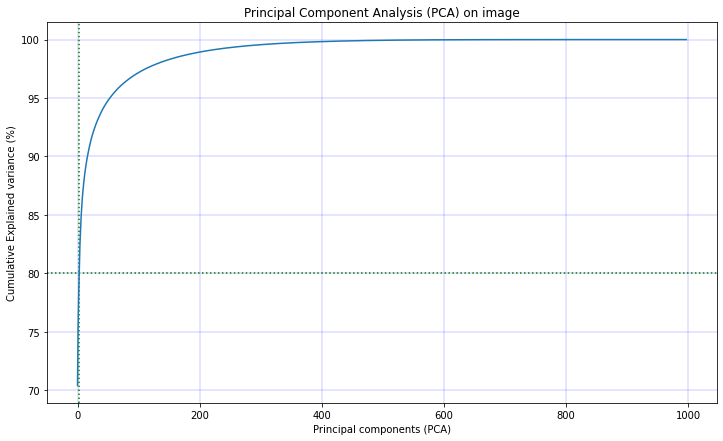

In [8]:
pca = PCA()
pca.fit(image2)

cumulated_variance = np.cumsum(pca.explained_variance_ratio_) * 100

pct_varlevel = 80

nb_pca = np.argmax(cumulated_variance >= pct_varlevel)
print("nbpca (number of principal components) =", nb_pca, "explains", pct_varlevel, "% of variance of the initial image")

plt.figure(figsize=[12,7])
plt.title('Principal Component Analysis (PCA) on image')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components (PCA)')
plt.axvline(x = nb_pca, color = "green", linestyle = "dotted")
plt.axhline(y = pct_varlevel, color = "green", linestyle = "dotted")
plt.grid(color = 'blue', linestyle = '-', linewidth = 0.2)

ax = plt.plot(cumulated_variance)

### PCA results

In [9]:
nbvals = len(pca.components_)

In [10]:
print("PCA analysis:\n")

values = [80, 85, 90, 92, 95, 99]

for i in range(len(values)):
    nbpcaval = np.argmax(cumulated_variance >= values[i])
    print(nbpcaval, '\tprincipal component(s) (PCA) explain', values[i], '% of variance')

PCA analysis:

3 	principal component(s) (PCA) explain 80 % of variance
7 	principal component(s) (PCA) explain 85 % of variance
17 	principal component(s) (PCA) explain 90 % of variance
26 	principal component(s) (PCA) explain 92 % of variance
53 	principal component(s) (PCA) explain 95 % of variance
208 	principal component(s) (PCA) explain 99 % of variance


In [11]:
def imagepca(image, nbpca):
    ipca = IncrementalPCA(n_components = nbpca)
    print('Number of PCA =', nbpca)
    imagenew = ipca.inverse_transform(ipca.fit_transform(image))
    title = "Image with " + str(nbpca) + " PCA"
    plt.figure(figsize=[15, 12])
    plt.title(title)
    plt.imshow(imagenew, cmap = plt.cm.gray)

### Viewing the image with multiple values of PCA

Number of PCA = 600


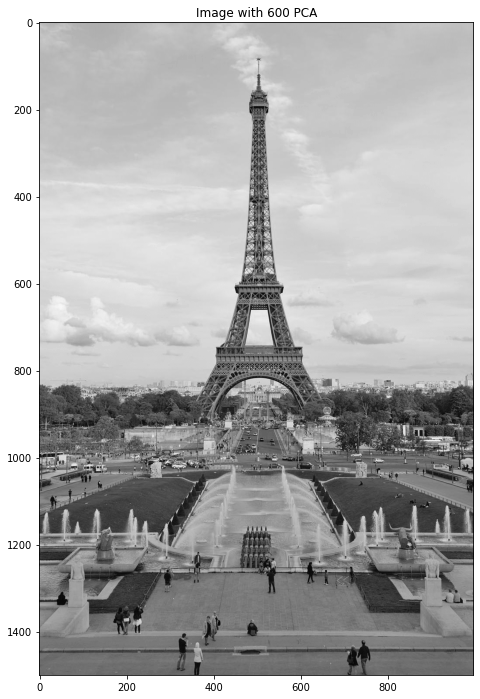

In [12]:
imagepca(image2, 600)

Number of PCA = 208


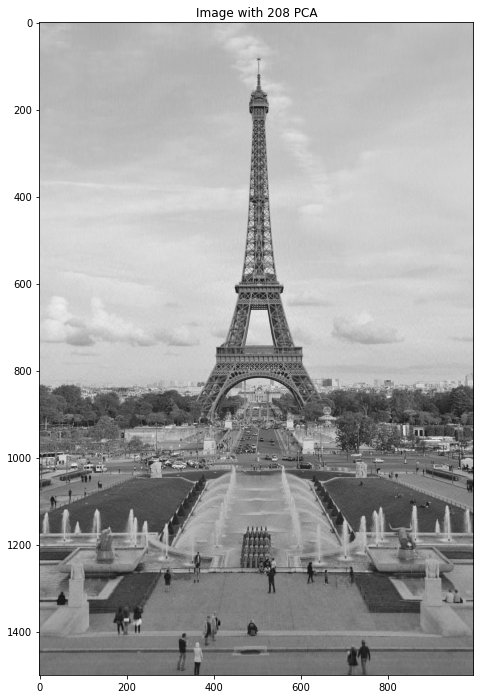

In [13]:
imagepca(image2, 208)

Number of PCA = 53


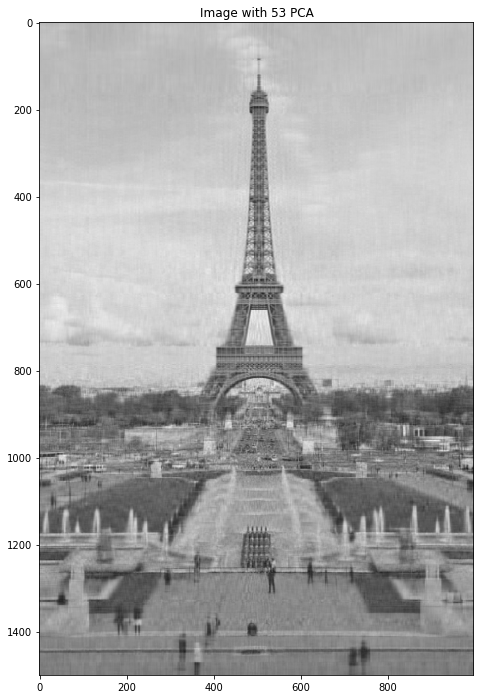

In [14]:
imagepca(image2, 53)

Number of PCA = 17


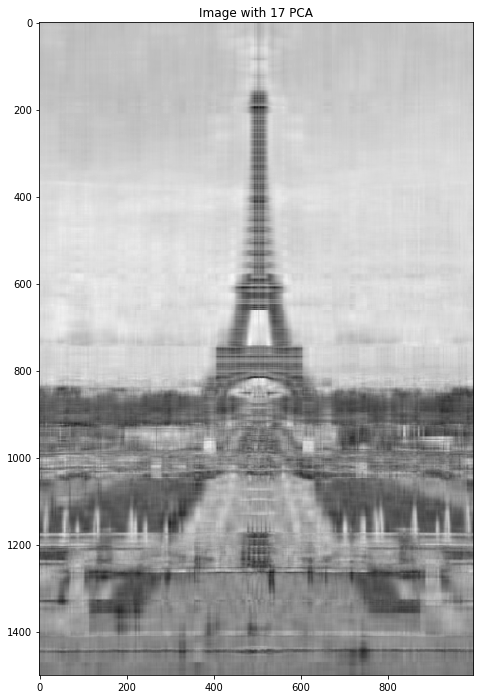

In [15]:
imagepca(image2, 17)

Number of PCA = 7


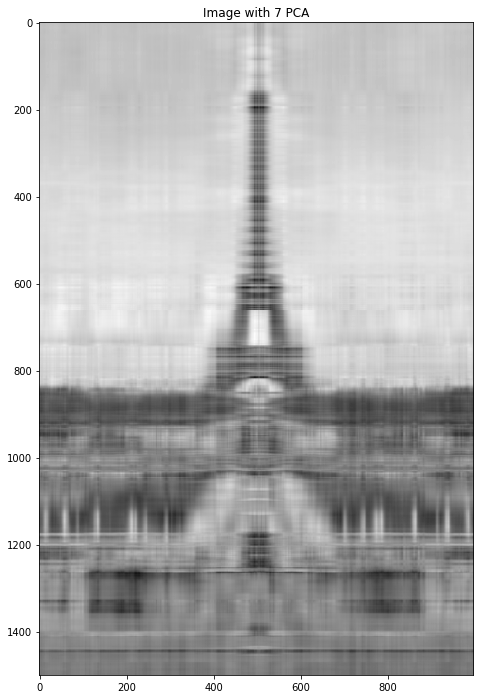

In [16]:
imagepca(image2, 7)

> Of course with a small amount of PCA the image quality is bad. 
We have the eigenvectors so it is possible to recreate the image by doing an inverse tranform on the eigenvectors to retrieve the intiail image.